# student-dropout-and-success-prediction

In [1]:
# import required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

## Data preparation

In [2]:
# load data
df = pd.read_csv("../data/dataset.csv")
df.shape

(4424, 35)

In [3]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('/', '_')
df.rename(columns={'nacionality':'nationality'}, inplace=True)

In [5]:
df.head()

,marital_status,application_mode,application_order,course,daytime_evening_attendance,previous_qualification,nationality,mother's_qualification,father's_qualification,mother's_occupation,...,curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
df.head().T

,0,1,2,3,4
marital_status,1,1,1,1,2
application_mode,8,6,1,8,12
application_order,5,1,5,2,1
course,2,11,5,15,3
daytime_evening_attendance,1,1,1,1,0
previous_qualification,1,1,1,1,1
nationality,1,1,1,1,1
mother's_qualification,13,1,22,23,22
father's_qualification,10,3,27,27,28
mother's_occupation,6,4,10,6,10


In [7]:
df.dtypes

marital_status                                      int64
application_mode                                    int64
application_order                                   int64
course                                              int64
daytime_evening_attendance                          int64
previous_qualification                              int64
nationality                                         int64
mother's_qualification                              int64
father's_qualification                              int64
mother's_occupation                                 int64
father's_occupation                                 int64
displaced                                           int64
educational_special_needs                           int64
debtor                                              int64
tuition_fees_up_to_date                             int64
gender                                              int64
scholarship_holder                                  int64
age_at_enrollm

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   marital_status                                  4424 non-null   int64  
 1   application_mode                                4424 non-null   int64  
 2   application_order                               4424 non-null   int64  
 3   course                                          4424 non-null   int64  
 4   daytime_evening_attendance                      4424 non-null   int64  
 5   previous_qualification                          4424 non-null   int64  
 6   nationality                                     4424 non-null   int64  
 7   mother's_qualification                          4424 non-null   int64  
 8   father's_qualification                          4424 non-null   int64  
 9   mother's_occupation                      

In [9]:
# check missing values
df.isnull().sum()

marital_status                                    0
application_mode                                  0
application_order                                 0
course                                            0
daytime_evening_attendance                        0
previous_qualification                            0
nationality                                       0
mother's_qualification                            0
father's_qualification                            0
mother's_occupation                               0
father's_occupation                               0
displaced                                         0
educational_special_needs                         0
debtor                                            0
tuition_fees_up_to_date                           0
gender                                            0
scholarship_holder                                0
age_at_enrollment                                 0
international                                     0
curricular_u

In [10]:
df.duplicated().sum()

np.int64(0)

- There are no nulls or duplicates.

## Exploratory data analysis

In [11]:
# For each column, let's look at first 5 unique values and total number of unique values
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

marital_status
[1 2 4 3 5]
6

application_mode
[ 8  6  1 12  9]
18

application_order
[5 1 2 4 3]
8

course
[ 2 11  5 15  3]
17

daytime_evening_attendance
[1 0]
2

previous_qualification
[ 1 12 16 14  8]
17

nationality
[ 1 15  3 14 12]
21

mother's_qualification
[13  1 22 23  3]
29

father's_qualification
[10  3 27 28  1]
34

mother's_occupation
[ 6  4 10  8  5]
32

father's_occupation
[10  4  8 11  6]
46

displaced
[1 0]
2

educational_special_needs
[0 1]
2

debtor
[0 1]
2

tuition_fees_up_to_date
[1 0]
2

gender
[1 0]
2

scholarship_holder
[0 1]
2

age_at_enrollment
[20 19 45 50 18]
46

international
[0 1]
2

curricular_units_1st_sem_(credited)
[0 2 3 6 7]
21

curricular_units_1st_sem_(enrolled)
[0 6 5 7 8]
23

curricular_units_1st_sem_(evaluations)
[ 0  6  8  9 10]
35

curricular_units_1st_sem_(approved)
[0 6 5 7 4]
23

curricular_units_1st_sem_(grade)
[ 0.         14.         13.42857143 12.33333333 11.85714286]
805

curricular_units_1st_sem_(without_evaluations)
[0 1 2 4 3]
11



#### Let's look at 'target' column

In [12]:
df.target.value_counts()

target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [13]:
df.target.value_counts(normalize=True)

target
Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: proportion, dtype: float64

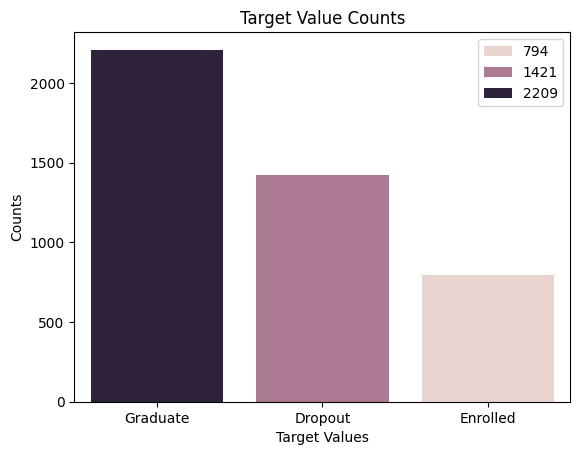

In [14]:
# Visualize target
target_counts = df.target.value_counts()

sns.barplot(x=target_counts.index, y=target_counts.values, hue=target_counts.values)
plt.xlabel("Target Values")
plt.ylabel("Counts")
plt.title("Target Value Counts")
plt.show()

#### Encoding the target column(Since it is the only non-numeric field in the dataset)
 - 'target' column in non-numeric. Let's convert to numeric.
 - There are 3 unique values in target column which we can replace by
    - Dropout -> 0
    - Enrolled -> 1
    - Graduate -> 2

In [15]:
df.target.unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [16]:
df['target'] = df['target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

In [17]:
df.target.unique()

array([0, 2, 1])

In [18]:
df.head()

,marital_status,application_mode,application_order,course,daytime_evening_attendance,previous_qualification,nationality,mother's_qualification,father's_qualification,mother's_occupation,...,curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [19]:
df.target.dtypes

dtype('int64')

In [20]:
df.describe().round(2)

,marital_status,application_mode,application_order,course,daytime_evening_attendance,previous_qualification,nationality,mother's_qualification,father's_qualification,mother's_occupation,...,curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,target
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,...,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00
mean,1.18,6.89,1.73,9.90,0.89,2.53,1.25,12.32,16.46,7.32,...,0.54,6.23,8.06,4.44,10.23,0.15,11.57,1.23,0.00,1.18
std,0.61,5.30,1.31,4.33,0.31,3.96,1.75,9.03,11.04,4.00,...,1.92,2.20,3.95,3.01,5.21,0.75,2.66,1.38,2.27,0.89
min,1.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,7.60,-0.80,-4.06,0.00
25%,1.00,1.00,1.00,6.00,1.00,1.00,1.00,2.00,3.00,5.00,...,0.00,5.00,6.00,2.00,10.75,0.00,9.40,0.30,-1.70,0.00
50%,1.00,8.00,1.00,10.00,1.00,1.00,1.00,13.00,14.00,6.00,...,0.00,6.00,8.00,5.00,12.20,0.00,11.10,1.40,0.32,1.00
75%,1.00,12.00,2.00,13.00,1.00,1.00,1.00,22.00,27.00,10.00,...,0.00,7.00,10.00,6.00,13.33,0.00,13.90,2.60,1.79,2.00
max,6.00,18.00,9.00,17.00,1.00,17.00,21.00,29.00,34.00,32.00,...,19.00,23.00,33.00,20.00,18.57,12.00,16.20,3.70,3.51,2.00


In [21]:
df.target.mean()

np.float64(1.178119349005425)

#### Feature importance: Correlation

In [22]:
# corelation of 'target' with the rest
df.corr()['target'].sort_values(ascending=False)

target                                            1.000000
curricular_units_2nd_sem_(approved)               0.624157
curricular_units_2nd_sem_(grade)                  0.566827
curricular_units_1st_sem_(approved)               0.529123
curricular_units_1st_sem_(grade)                  0.485207
tuition_fees_up_to_date                           0.409827
scholarship_holder                                0.297595
curricular_units_2nd_sem_(enrolled)               0.175847
curricular_units_1st_sem_(enrolled)               0.155974
displaced                                         0.113986
curricular_units_2nd_sem_(evaluations)            0.092721
application_order                                 0.089791
daytime_evening_attendance                        0.075107
curricular_units_2nd_sem_(credited)               0.054004
father's_occupation                               0.051702
mother's_occupation                               0.048424
curricular_units_1st_sem_(credited)               0.0481

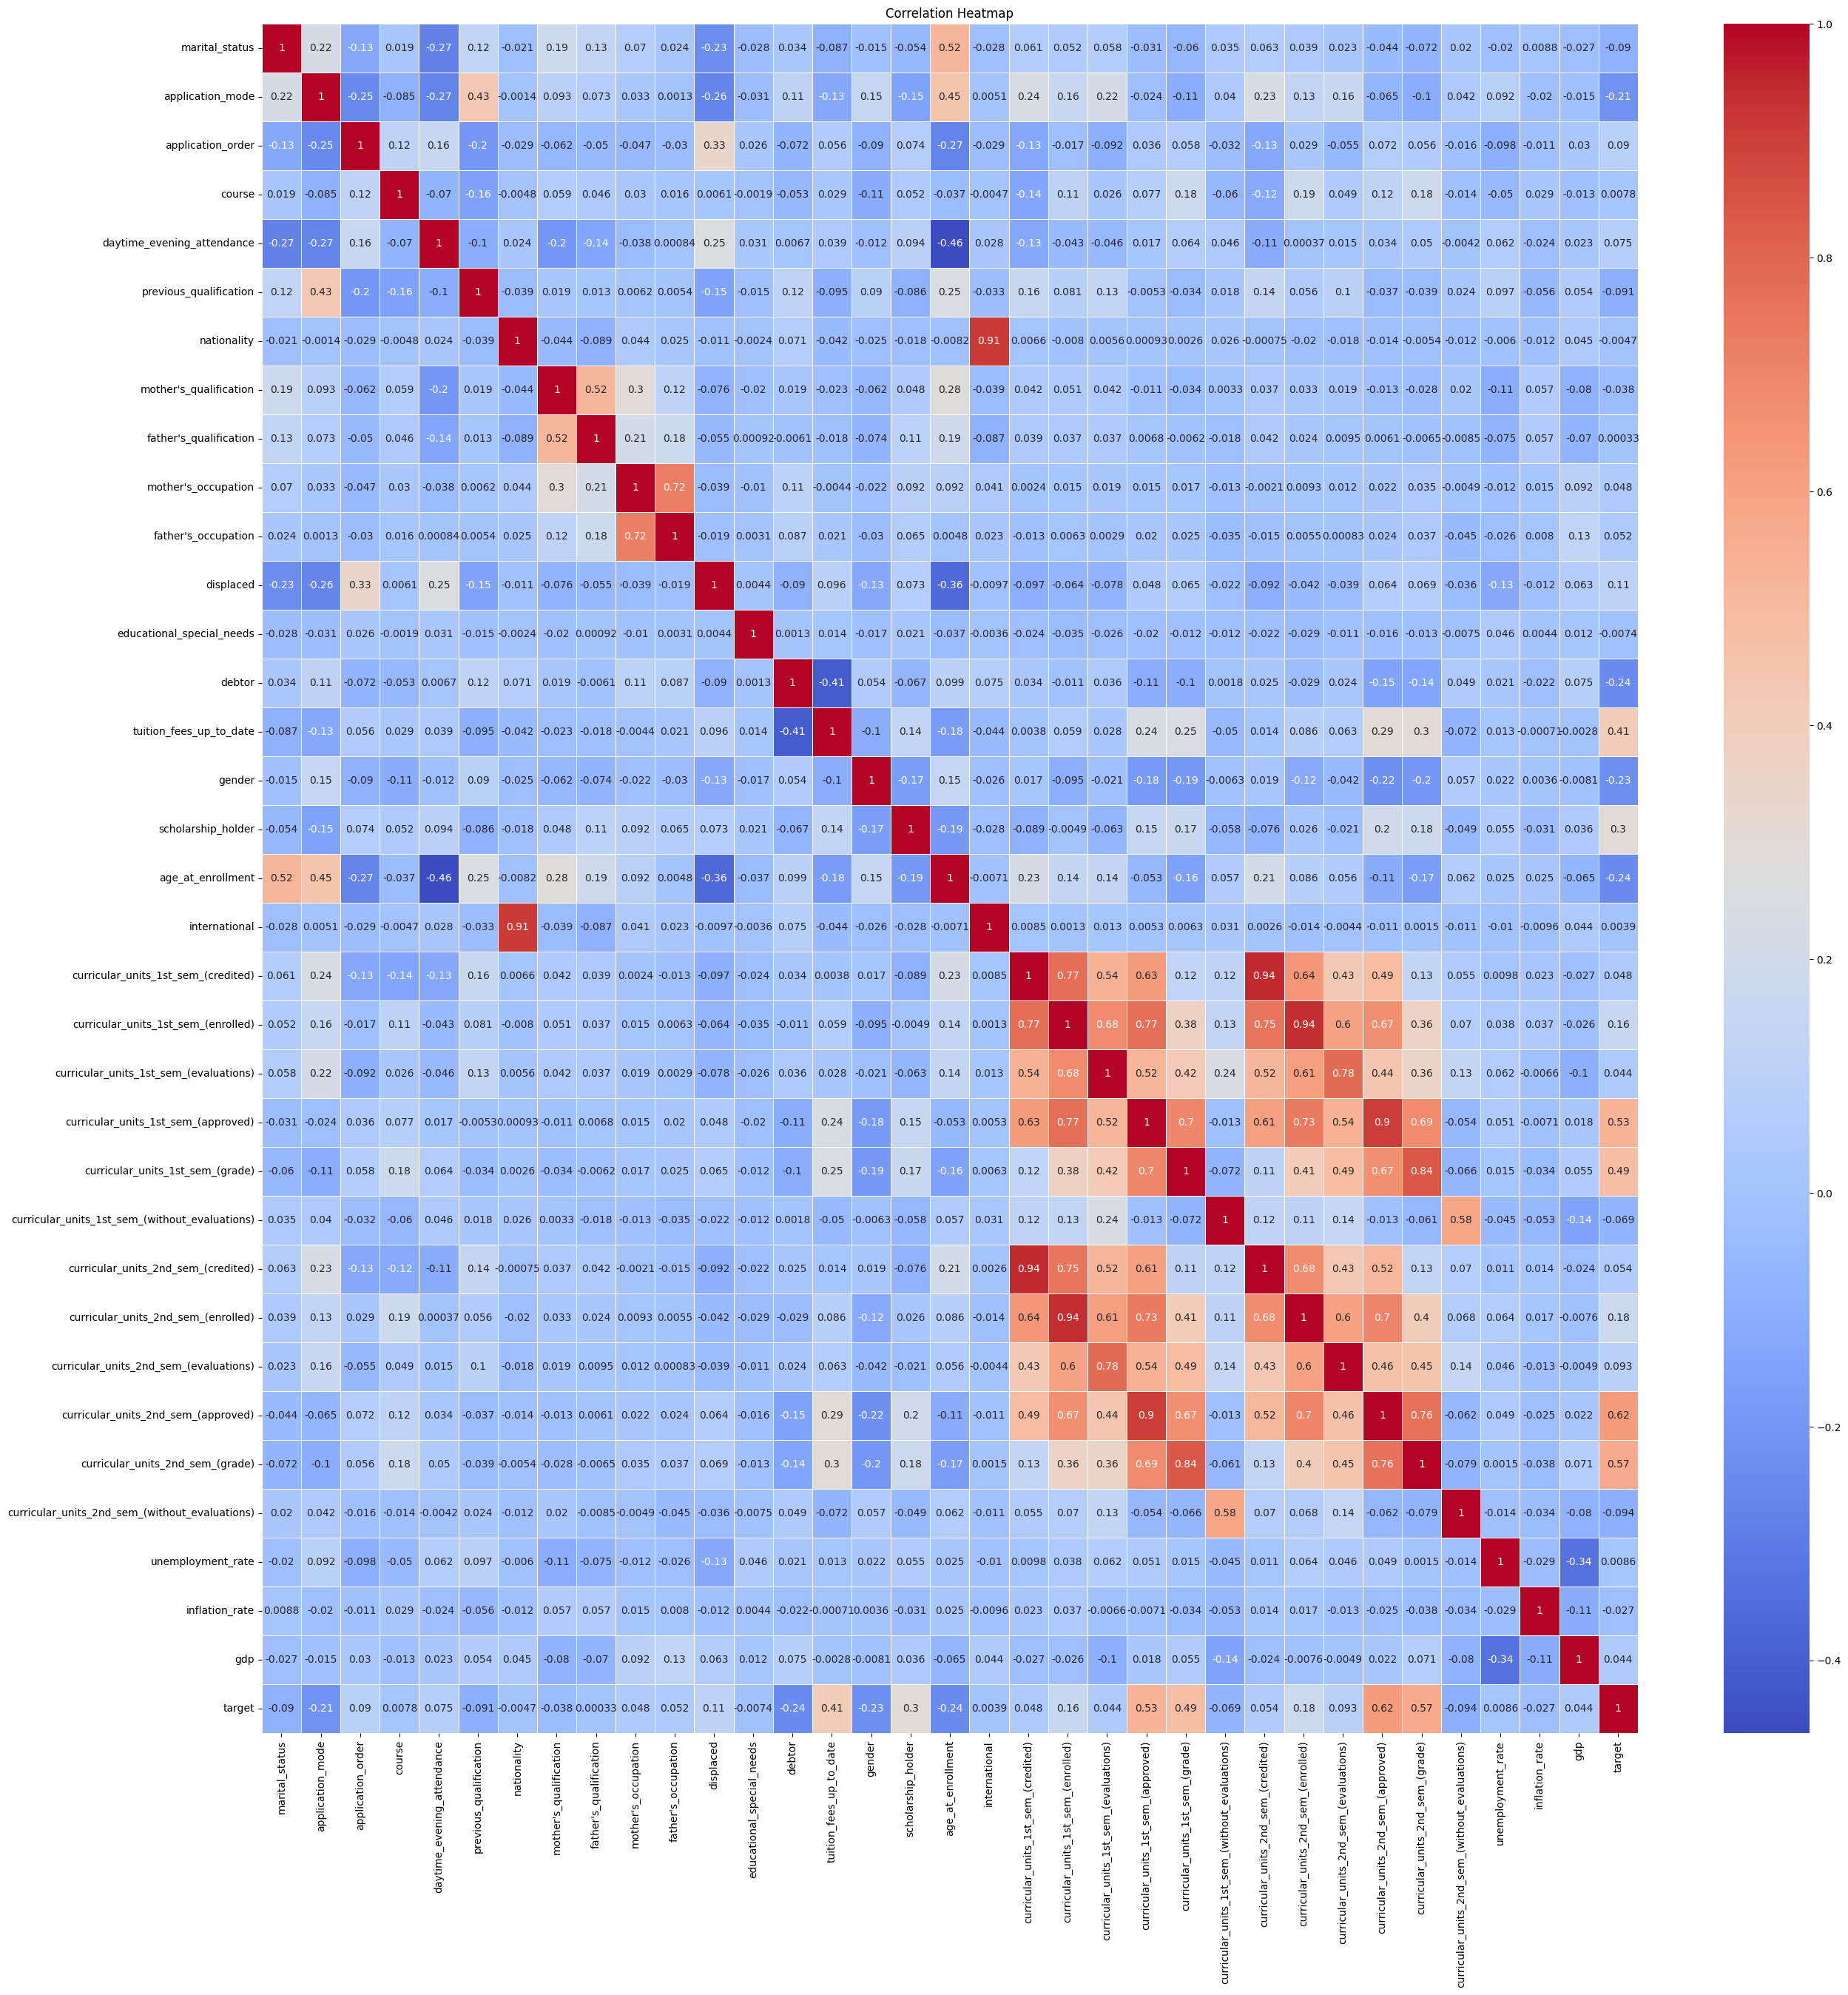

In [23]:
# Correlation Heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

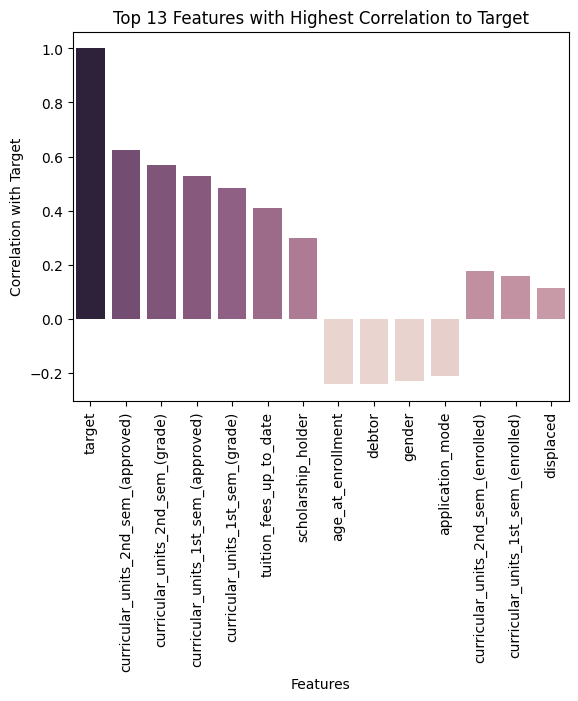

In [24]:
# Top features
correlations = df.corr()['target']
top_13_features = correlations.abs().nlargest(14).index
top_13_corr_values = correlations[top_13_features]

# plt.figure(figsize=(10, 11))
sns.barplot(x=top_13_features, y=top_13_corr_values, hue=top_13_corr_values, legend=None)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Top 13 Features with Highest Correlation to Target')
plt.xticks(rotation=90)
plt.show()

In [25]:
top_13_features

Index(['target', 'curricular_units_2nd_sem_(approved)',
       'curricular_units_2nd_sem_(grade)',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(grade)', 'tuition_fees_up_to_date',
       'scholarship_holder', 'age_at_enrollment', 'debtor', 'gender',
       'application_mode', 'curricular_units_2nd_sem_(enrolled)',
       'curricular_units_1st_sem_(enrolled)', 'displaced'],
      dtype='object')

In [26]:
top_13_corr_values

target                                 1.000000
curricular_units_2nd_sem_(approved)    0.624157
curricular_units_2nd_sem_(grade)       0.566827
curricular_units_1st_sem_(approved)    0.529123
curricular_units_1st_sem_(grade)       0.485207
tuition_fees_up_to_date                0.409827
scholarship_holder                     0.297595
age_at_enrollment                     -0.243438
debtor                                -0.240999
gender                                -0.229270
application_mode                      -0.212025
curricular_units_2nd_sem_(enrolled)    0.175847
curricular_units_1st_sem_(enrolled)    0.155974
displaced                              0.113986
Name: target, dtype: float64

<Axes: xlabel='curricular_units_1st_sem_(grade)', ylabel='curricular_units_2nd_sem_(approved)'>

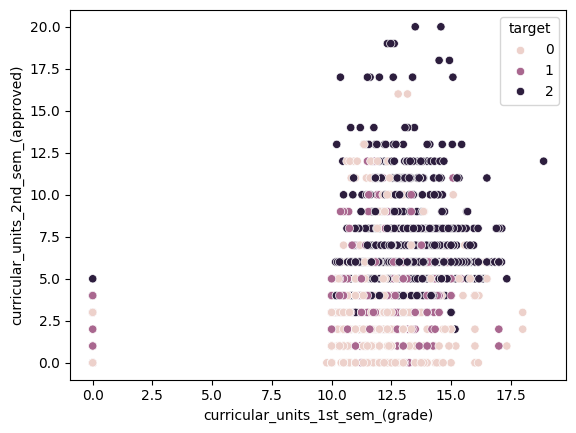

In [27]:
sns.scatterplot(data=df, x='curricular_units_1st_sem_(grade)', y='curricular_units_2nd_sem_(approved)', hue='target')

<Axes: xlabel='curricular_units_1st_sem_(approved)', ylabel='curricular_units_2nd_sem_(grade)'>

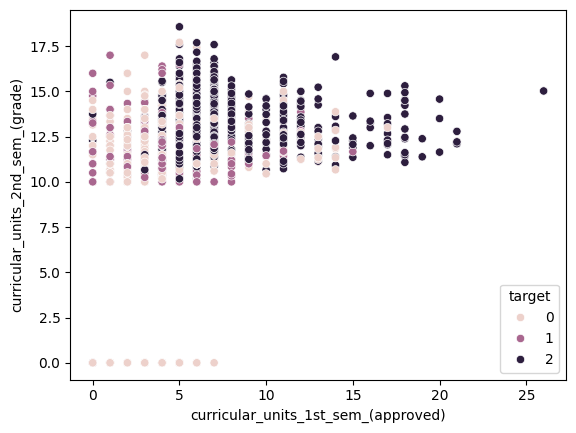

In [28]:
sns.scatterplot(data=df, x='curricular_units_1st_sem_(approved)', y='curricular_units_2nd_sem_(grade)', hue='target')

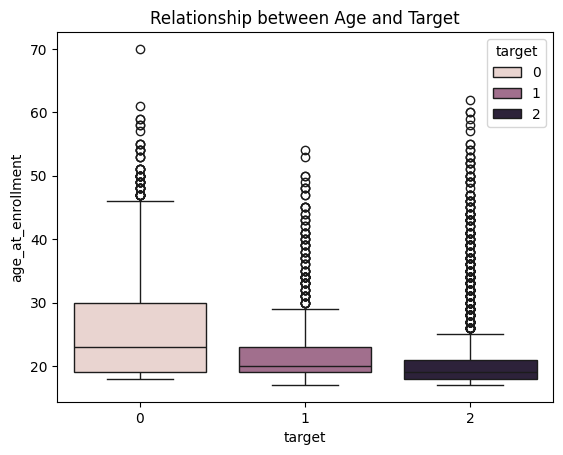

In [29]:
# Relationship between Age and Target
sns.boxplot(data=df, x='target', y='age_at_enrollment', hue='target')
plt.title('Relationship between Age and Target')
plt.show()

<Axes: xlabel='age_at_enrollment', ylabel='Count'>

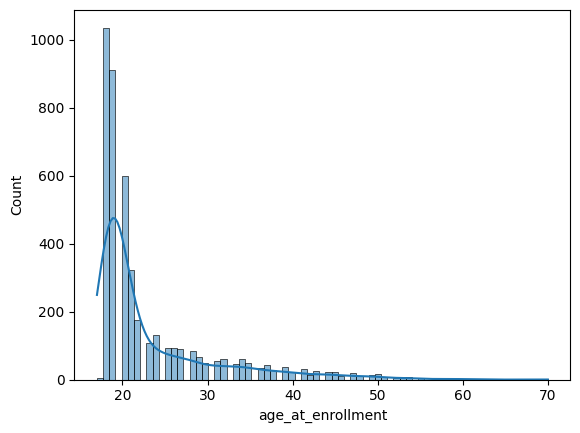

In [30]:
# Distribution of age of students at the time of enrollment
sns.histplot(data=df['age_at_enrollment'], kde=True)

### Feature selection

In [31]:
features = ['curricular_units_2nd_sem_(approved)',
       'curricular_units_2nd_sem_(grade)',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(grade)', 'tuition_fees_up_to_date',
       'scholarship_holder', 'age_at_enrollment', 'debtor', 'gender',
       'application_mode', 'curricular_units_2nd_sem_(enrolled)',
       'curricular_units_1st_sem_(enrolled)', 'displaced', 'target']

In [32]:
df = df[features]
df.shape

(4424, 14)

In [33]:
df.head()

,curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_1st_sem_(approved),curricular_units_1st_sem_(grade),tuition_fees_up_to_date,scholarship_holder,age_at_enrollment,debtor,gender,application_mode,curricular_units_2nd_sem_(enrolled),curricular_units_1st_sem_(enrolled),displaced,target
0,0,0.000000,0,0.000000,1,0,20,0,1,8,0,0,1,0
1,6,13.666667,6,14.000000,0,0,19,0,1,6,6,6,1,2
2,0,0.000000,0,0.000000,0,0,19,0,1,1,6,6,1,0
3,5,12.400000,6,13.428571,1,0,20,0,0,8,6,6,1,2
4,6,13.000000,5,12.333333,1,0,45,0,0,12,6,6,0,2


## Setting up the validation framework

- Perform the train/validation/test split with Scikit-Learn
- 60/20/20 split
- scaling
- handling class imbalence

In [34]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=13)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=13)

In [35]:
len(df_train), len(df_val), len(df_test)

(2654, 885, 885)

In [36]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [37]:
y_train = df_train.target.values
y_val = df_val.target.values
y_test = df_test.target.values

In [38]:
# Drop column 'target'
df_train.drop('target', axis=1, inplace=True)
df_val.drop('target', axis=1, inplace=True)
df_test.drop('target', axis=1, inplace=True)

In [39]:
df_train

,curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_1st_sem_(approved),curricular_units_1st_sem_(grade),tuition_fees_up_to_date,scholarship_holder,age_at_enrollment,debtor,gender,application_mode,curricular_units_2nd_sem_(enrolled),curricular_units_1st_sem_(enrolled),displaced
0,5,12.600000,3,11.333333,1,0,20,0,0,8,5,5,1
1,3,12.000000,4,12.000000,1,0,19,0,0,1,5,5,1
2,6,13.333333,6,13.333333,1,0,19,0,0,14,7,7,1
3,0,0.000000,0,0.000000,1,0,18,0,0,1,0,0,1
4,7,12.912500,7,11.828571,1,0,18,0,1,14,8,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,8,13.906250,7,13.462857,1,1,18,0,1,8,8,7,1
2650,6,10.500000,4,11.250000,1,1,20,0,0,8,6,6,0
2651,5,12.288000,5,12.288000,1,0,18,0,1,1,8,8,1
2652,4,12.600000,10,12.500000,1,0,24,0,0,14,7,10,1


In [40]:
y_train

array([1, 1, 2, ..., 0, 2, 0])

In [41]:
# scaling features
scaler = StandardScaler()

df_train_scaled = scaler.fit_transform(df_train)
df_val_scaled = scaler.transform(df_val)  # Only transform, don't fit!
df_test_scaled = scaler.transform(df_test)  # Only transform, don't fit!

In [42]:
df_train_scaled

array([[ 0.19316702,  0.45587246, -0.54611761, ..., -0.5663519 ,
        -0.52261135,  0.91192544],
       [-0.46493988,  0.34096883, -0.22223021, ..., -0.5663519 ,
        -0.52261135,  0.91192544],
       [ 0.52222048,  0.59631022,  0.42554461, ...,  0.34544546,
         0.29520146,  0.91192544],
       ...,
       [ 0.19316702,  0.39612257,  0.1016572 , ...,  0.80134413,
         0.70410786,  0.91192544],
       [-0.13588643,  0.45587246,  1.72109424, ...,  0.34544546,
         1.52192066,  0.91192544],
       [-1.45210024, -1.95710361, -1.19389243, ..., -0.5663519 ,
        -0.11370495, -1.09658088]])

In [43]:
#  handling class imbalance - Use class weights
class_weights = compute_class_weight('balanced', 
                                   classes=np.unique(y_train), 
                                   y=y_train)
weight_dict = dict(zip(np.unique(y_train), class_weights))

In [44]:
class_weights

array([1.01569078, 1.86245614, 0.67635066])

In [45]:
weight_dict

{np.int64(0): np.float64(1.0156907768848067),
 np.int64(1): np.float64(1.8624561403508773),
 np.int64(2): np.float64(0.6763506625891947)}

## Model training

#### Logistic regression

In [46]:
# logistic regression
model_lr = OneVsRestClassifier(LogisticRegression(
    # multi_class='multinomial',
    solver='lbfgs',
    class_weight=weight_dict,
    n_jobs=-1, 
    random_state=13)
    )
model_lr.fit(df_train_scaled, y_train)

# Get predictions
y_pred = model_lr.predict(df_val_scaled)
y_pred_proba = model_lr.predict_proba(df_val_scaled)

In [47]:
y_pred[:5]

array([1, 0, 0, 0, 2])

In [48]:
y_pred_proba[:5]

array([[0.34339777, 0.38278766, 0.27381456],
       [0.49142146, 0.31684958, 0.19172896],
       [0.50063022, 0.43643349, 0.0629363 ],
       [0.79174767, 0.20676058, 0.00149174],
       [0.08360309, 0.22384261, 0.6925543 ]])

In [49]:
y_val[:5]

array([2, 1, 0, 0, 2])

In [50]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       288
           1       0.52      0.15      0.23       172
           2       0.76      0.95      0.84       425

    accuracy                           0.74       885
   macro avg       0.68      0.63      0.61       885
weighted avg       0.71      0.74      0.70       885



In [51]:
# Per-class metrics
precision = precision_score(y_val, y_pred, average=None)
recall = recall_score(y_val, y_pred, average=None)
f1 = f1_score(y_val, y_pred, average=None)

print("\nPer-class metrics:")
for i, (p, r, f) in enumerate(zip(precision, recall, f1)):
    print(f"Class {i}:")
    print(f"  Precision: {p:.3f}")
    print(f"  Recall: {r:.3f}")
    print(f"  F1-score: {f:.3f}")


Per-class metrics:
Class 0:
  Precision: 0.752
  Recall: 0.792
  F1-score: 0.772
Class 1:
  Precision: 0.521
  Recall: 0.145
  F1-score: 0.227
Class 2:
  Precision: 0.758
  Recall: 0.953
  F1-score: 0.845


In [52]:
# ROC-AUC
roc_auc = roc_auc_score(y_val,y_pred_proba, multi_class='ovr')
print(f"\nROC-AUC score: {roc_auc}")


ROC-AUC score: 0.8388565112606953


In [53]:
# PR-AUC (better than ROC-AUC for imbalanced data)
pr_auc = average_precision_score(y_val, y_pred_proba, average='weighted')
print(f"\nPR-AUC Score: {pr_auc}")


PR-AUC Score: 0.7726358259486164


In [54]:
# Confusion Matrix (normalized)
cm = confusion_matrix(y_val, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("\nNormalized Confusion Matrix:")
print(cm_normalized)


Normalized Confusion Matrix:
[[0.79166667 0.04861111 0.15972222]
 [0.37209302 0.14534884 0.48255814]
 [0.02588235 0.02117647 0.95294118]]


#### Decision Tree Classifier

In [55]:
# Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=13)
model_dt.fit(df_train_scaled, y_train)

# Get predictions
y_pred = model_dt.predict(df_val_scaled)
y_pred_proba = model_dt.predict_proba(df_val_scaled)

In [56]:
# ROC-AUC
roc_auc = roc_auc_score(y_val,y_pred_proba, multi_class='ovr')
print(f"\nROC-AUC score: {roc_auc}")


ROC-AUC score: 0.7302741579689797


In [57]:
# Identify overfitting
y_pred_proba_t = model_dt.predict_proba(df_train_scaled)
roc_auc_t = roc_auc_score(y_train,y_pred_proba_t, multi_class='ovr')
print(f"\nROC-AUC score: {roc_auc_t}")


ROC-AUC score: 0.999952580671926


In [58]:
# parameter tuning
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        model_dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s, random_state=13)
        model_dt.fit(df_train_scaled, y_train)

        # Get predictions
        # y_pred = model_dt.predict(df_val_scaled)
        y_pred_proba = model_dt.predict_proba(df_val_scaled)
        roc_auc = roc_auc_score(y_val,y_pred_proba, multi_class='ovr')
        
        scores.append((depth, s, roc_auc))

In [59]:
columns = ['max_depth', 'min_samples_leaf', 'roc_auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [60]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['roc_auc'])
df_scores_pivot.round(3)

roc_auc              
max_depth              4      5      6
min_samples_leaf                      
1                  0.825  0.829  0.827
5                  0.822  0.829  0.832
10                 0.827  0.832  0.835
15                 0.823  0.834  0.843
20                 0.823  0.830  0.837
100                0.830  0.832  0.831
200                0.821  0.821  0.821
500                0.784  0.784  0.784

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

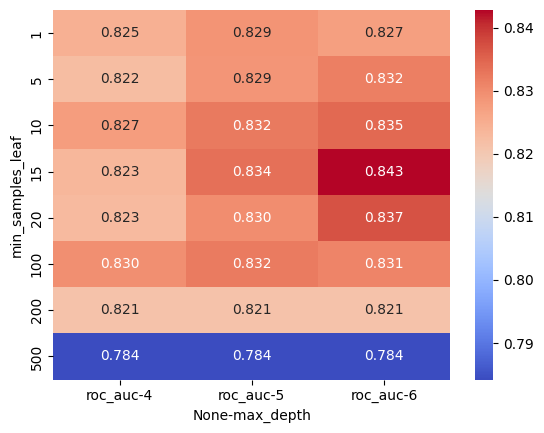

In [61]:
sns.heatmap(df_scores_pivot, annot=True, cmap='coolwarm', fmt=".3f")

In [62]:
model_dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15, random_state=13)
model_dt.fit(df_train_scaled, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15, random_state=13)

In [63]:
y_pred_proba = model_dt.predict_proba(df_val_scaled)
roc_auc = roc_auc_score(y_val,y_pred_proba, multi_class='ovr')
print(f"\nROC-AUC score: {roc_auc}")


ROC-AUC score: 0.8428157884080035


In [64]:
print(export_text(model_dt, feature_names=features[:-1]))

|--- curricular_units_2nd_sem_(approved) <= 0.03
|   |--- curricular_units_2nd_sem_(approved) <= -0.96
|   |   |--- curricular_units_2nd_sem_(enrolled) <= -2.62
|   |   |   |--- scholarship_holder <= 0.60
|   |   |   |   |--- age_at_enrollment <= -0.50
|   |   |   |   |   |--- gender <= 0.29
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- gender >  0.29
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- age_at_enrollment >  -0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- scholarship_holder >  0.60
|   |   |   |   |--- class: 2
|   |   |--- curricular_units_2nd_sem_(enrolled) >  -2.62
|   |   |   |--- curricular_units_2nd_sem_(approved) <= -1.29
|   |   |   |   |--- age_at_enrollment <= -0.10
|   |   |   |   |   |--- curricular_units_2nd_sem_(enrolled) <= -0.34
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- curricular_units_2nd_sem_(enrolled) >  -0.34
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- age_at_enrollment >  -0.10
|  

#### Random Forest Classifier

In [65]:
# Random Forest Classifier
model_rf = RandomForestClassifier(random_state=13)
model_rf.fit(df_train_scaled, y_train)

# Get predictions
y_pred = model_rf.predict(df_val_scaled)
y_pred_proba = model_rf.predict_proba(df_val_scaled)

In [66]:
# ROC-AUC
roc_auc = roc_auc_score(y_val,y_pred_proba, multi_class='ovr')
print(f"\nROC-AUC score: {roc_auc}")


ROC-AUC score: 0.8568087714473528


In [67]:
# Identify overfitting
y_pred_proba_t = model_dt.predict_proba(df_train_scaled)
roc_auc_t = roc_auc_score(y_train,y_pred_proba_t, multi_class='ovr')
print(f"\nROC-AUC score: {roc_auc_t}")


ROC-AUC score: 0.8821174858892936


In [68]:
# parameter tuning

scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        model_rf = RandomForestClassifier(n_estimators=n,
                                          max_depth=d,
                                          n_jobs=-1, 
                                          random_state=13)
        model_rf.fit(df_train_scaled, y_train)

        # Get predictions
        # y_pred = model_dt.predict(df_val_scaled)
        y_pred_proba = model_rf.predict_proba(df_val_scaled)
        roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')
        
        scores.append((d, n, roc_auc))

In [69]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'roc_auc'])
# df_scores

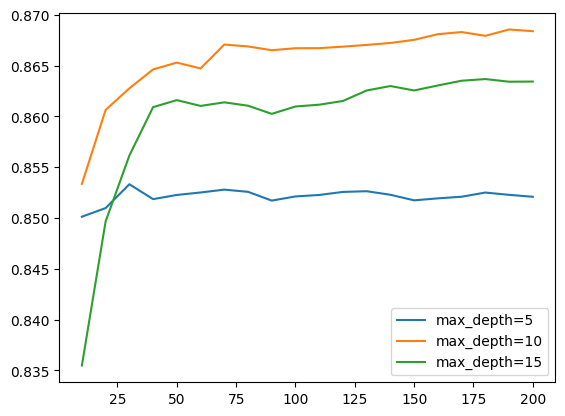

In [70]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.roc_auc,
             label='max_depth=%d' % d)

plt.legend()

In [71]:
max_depth = 10

In [72]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        model_rf = RandomForestClassifier(n_estimators=n,
                                          max_depth=max_depth,
                                          min_samples_leaf=s,
                                          n_jobs=-1, 
                                          random_state=13)
        model_rf.fit(df_train_scaled, y_train)

        # Get predictions
        # y_pred = model_dt.predict(df_val_scaled)
        y_pred_proba = model_rf.predict_proba(df_val_scaled)
        roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')
        
        scores.append((s, n, roc_auc))  

In [73]:
columns = ['min_samples_leaf', 'n_estimators', 'roc_auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [74]:
df_scores

,min_samples_leaf,n_estimators,roc_auc
0,1,10,0.853361
1,1,20,0.860641
2,1,30,0.862763
3,1,40,0.864625
4,1,50,0.865295
...,...,...,...
95,50,160,0.843516
96,50,170,0.843976
97,50,180,0.844337
98,50,190,0.844434


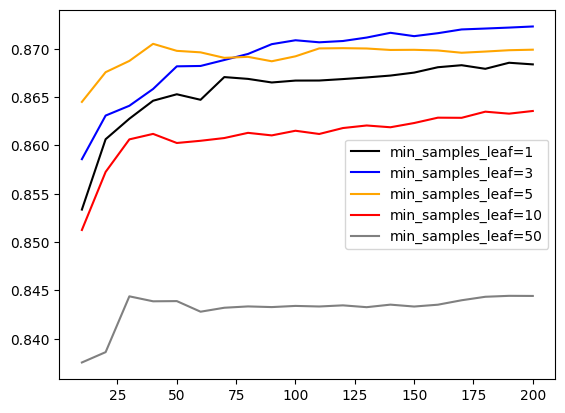

In [75]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.roc_auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [76]:
max_depth = 10
min_samples_leaf = 3

In [77]:
model_rf = RandomForestClassifier(n_estimators=200,
                                          max_depth=d,
                                          min_samples_leaf=min_samples_leaf,
                                          n_jobs=-1, 
                                          random_state=13)
model_rf.fit(df_train_scaled, y_train)

# Get predictions
# y_pred = model_dt.predict(df_val_scaled)
y_pred_proba = model_rf.predict_proba(df_val_scaled)
roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')
print(f"\nROC-AUC score: {roc_auc}")


ROC-AUC score: 0.8694886681977231


#### Gradient boosting - XGBoost

In [78]:
# xgboost
dtrain = xgb.DMatrix(df_train_scaled, label=y_train, feature_names=features[:-1])
dval = xgb.DMatrix(df_val_scaled, label=y_val, feature_names=features[:-1])

In [79]:
dval

In [80]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'multi:softprob',
    'num_class': 3,
    'nthread': 8,
    'eval_metric': ['auc'],
    
    'seed': 1,
    'verbosity': 1,
}

model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=10)

- The xgb predict() function returns the class probabilities when using 'multi:softprob' as objective

In [81]:
y_pred_proba = model_xgb.predict(dval)
roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')
print(f"\nROC-AUC score: {roc_auc}")


ROC-AUC score: 0.8606770432924321


In [82]:
y_pred[:5]

array([1, 1, 0, 0, 2])

#### xgb parameter tuning using RandomizedSearchCV

In [83]:
# Define the parameter grid for tuning
param_grid = {
    'eta': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'lambda': [1, 1.5, 2, 3],           # L2 regularization
    'alpha': [0, 0.1, 0.5, 1],          # L1 regularization
    'n_estimators': [50, 100, 150]
}

In [84]:
# Initialize the XGBClassifier with base settings
xgb_clf = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    nthread=8,
    # use_label_encoder=False,
    seed=1
)

In [85]:
# Initialize RandomizedSearchCV for parameter tuning
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings sampled
    scoring='roc_auc_ovr',  # Optimizing for ROC AUC in multiclass setting
    cv=3,  # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

In [86]:
# Fit the random search model to find the best parameters
random_search.fit(df_train_scaled, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           nthread=8, num_class=3, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'alpha': [0, 0.1, 0.5, 1],
                                        'colsample_bytree': [0.6, 0.8, 1.0],
                                        'eta': [0.01, 0.1, 0.2, 0.3],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'lambda': [1, 1.5, 2, 3],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [50, 100, 150],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc_ovr', verbose=1)

In [87]:
# Get the best parameters and score from the search
best_params = random_search.best_params_
print("Best parameters found: ", best_params)
print("Best ROC-AUC score from tuning: ", random_search.best_score_)

Best parameters found:  {'subsample': 0.8, 'n_estimators': 50, 'min_child_weight': 5, 'max_depth': 5, 'lambda': 1.5, 'gamma': 0.3, 'eta': 0.1, 'colsample_bytree': 0.6, 'alpha': 0}
Best ROC-AUC score from tuning:  0.8726221893780975


In [88]:
# Train the final model with the best parameters
xgb_clf_best = XGBClassifier(
    **best_params,
    objective='multi:softprob',
    num_class=3,
    use_label_encoder=False,
    nthread=8,
    seed=1
)

xgb_clf_best.fit(df_train_scaled, y_train)

/home/codespace/.local/share/virtualenvs/student-dropout-and-success-prediction-5DVdsW5Y/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:38:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=0.3, grow_policy=None,
              importance_type=None, interaction_constraints=None, lambda=1.5,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50, ...)

In [89]:
# Predict probabilities on the validation set
y_pred_proba = xgb_clf_best.predict_proba(df_val_scaled)
roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')
print(f"\nFinal ROC-AUC score with best parameters: {roc_auc}")


Final ROC-AUC score with best parameters: 0.8697123730202588


## Selecting the final model

- Choosing between logistic regression, decision tree, random forest and xgboost
- Training the final model
- Saving the model

In [90]:
# logistic regression
model_lr = OneVsRestClassifier(LogisticRegression(
    solver='lbfgs',
    class_weight=weight_dict,
    n_jobs=-1, 
    random_state=13)
    )
model_lr.fit(df_train_scaled, y_train)

# Get predictions
y_pred_proba = model_lr.predict_proba(df_val_scaled)
roc_auc = roc_auc_score(y_val,y_pred_proba, multi_class='ovr')
print(f"\nROC-AUC score: {roc_auc}")


ROC-AUC score: 0.8388565112606953


In [91]:
# decision tree
model_dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15, random_state=13)
model_dt.fit(df_train_scaled, y_train)

# Get predictions
y_pred_proba = model_dt.predict_proba(df_val_scaled)
roc_auc = roc_auc_score(y_val,y_pred_proba, multi_class='ovr')
print(f"\nROC-AUC score: {roc_auc}")


ROC-AUC score: 0.8428157884080035


In [92]:
# random forest
model_rf = RandomForestClassifier(n_estimators=200,
                                          max_depth=10,
                                          min_samples_leaf=3,
                                          n_jobs=-1, 
                                          random_state=13)
model_rf.fit(df_train_scaled, y_train)

# Get predictions
y_pred_proba = model_rf.predict_proba(df_val_scaled)
roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')
print(f"\nROC-AUC score: {roc_auc}")


ROC-AUC score: 0.8723097317518084


In [93]:
xgb_params = {
    'subsample': 0.8,
    # 'n_estimators': 50,
    'min_child_weight': 5,
    'max_depth': 5,
    'lambda': 1.5,
    'gamma': 0.3,
    'eta': 0.1,
    'colsample_bytree': 0.6,
    'alpha': 0,
    
    'objective': 'multi:softprob',
    'num_class': 3,
    'nthread': 8,
    'eval_metric': ['auc'],
    
    'seed': 1,
    'verbosity': 1,
}

model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=50)

# Get predictions
y_pred_proba = model_xgb.predict(dval)
roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')
print(f"\nROC-AUC score: {roc_auc}")


ROC-AUC score: 0.8697123730202588


#### Conclusion: we are selecting random forest model

## using model for prediction

In [94]:
student = df_test.iloc[[6]]

In [95]:
student.T

,6
curricular_units_2nd_sem_(approved),8.00000
curricular_units_2nd_sem_(grade),14.07125
curricular_units_1st_sem_(approved),8.00000
curricular_units_1st_sem_(grade),14.07125
tuition_fees_up_to_date,1.00000
scholarship_holder,1.00000
age_at_enrollment,19.00000
debtor,0.00000
gender,0.00000
application_mode,1.00000


In [96]:
X = scaler.transform(student)

In [97]:
X

array([[ 1.18032738,  0.73762571,  1.07331942,  0.70378688,  0.37421166,
         1.76125219, -0.57179102, -0.35766157, -0.75034346, -1.09714697,
         0.80134413,  0.70410786,  0.91192544]])

In [98]:
# Get predictions
y_pred = model_rf.predict(X)
y_pred_proba = model_rf.predict_proba(X)

In [99]:
# Define the mapping
mapping = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}

In [100]:
# Map predictions to labels
y_pred_labels = [mapping[pred] for pred in y_pred]

In [101]:
# Print predictions and their probabilities
for i, (label, proba) in enumerate(zip(y_pred_labels, y_pred_proba)):
    print(f"Student {i+1}: Prediction = {label}, Probabilities = {proba}")

Sample 1: Prediction = Graduate, Probabilities = [0.01984004 0.03669757 0.94346239]


In [102]:
y_pred

array([2])

In [103]:
y_test[6]

np.int64(2)